In [171]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [192]:
#folder = r"C:/Users/richa/OneDrive/AC&HRI/SensorData/20180228/Empatica_Lynray/"
folder = r"C:/Users/richa/OneDrive/AC&HRI/SensorData/20180314/Lynray/"
#folder = r"C:/Users/richa/OneDrive/AC&HRI/SensorData/20180314/Toby1/"
folder = r"C:/Users/richa/Documents/CSML/Term2/AC&HRI/MusicERS/data/empatica/20180319/RichardSterry/"

In [193]:
sensor_file_list = ('ACC', 'BVP', 'EDA', 'HR', 'IBI', 'TEMP')
num_sensors = len(sensor_file_list)

In [194]:
sensor = dict()
sensor['TEMP'] = {'cols':('degrees_celsius',), 'sample_rate_in_header':True}
sensor['EDA'] = {'cols':('eda_micro_siemens',), 'sample_rate_in_header':True}
sensor['BVP'] = {'cols':('bvp',), 'sample_rate_in_header':True}
sensor['ACC'] = {'cols':('x/64g', 'y/64g', 'z/64g'), 'sample_rate_in_header':True}
sensor['IBI'] = {'cols':('duration_s',), 'sample_rate_in_header':False}
sensor['HR'] = {'cols':('average_hr',), 'sample_rate_in_header':True}

In [195]:
#tmp = sensor['IBI']
#sensor = dict()
#sensor['IBI'] = tmp

In [196]:
sensor_data = dict()
for i, this_sensor in enumerate(sensor):
    b_sample_rate = True
    header = [0,1]
    if sensor[this_sensor]['sample_rate_in_header'] == False:
        b_sample_rate = False
        header = 0
            
    tmp = pd.read_csv(os.path.join(folder, this_sensor+'.csv'), header=header)
    
    if b_sample_rate:
        start_time_utc = tmp.columns[0][0]
        sample_rate = tmp.columns[0][1]
        print(this_sensor + ' ' + sample_rate)
    else:
        start_time_utc = tmp.columns[0]  
        
    num_samples = len(tmp)
    #print(this_sensor + ' ' + str(num_samples))
    start_dt = pd.to_datetime(start_time_utc, unit='s')
    
    if b_sample_rate:
        dts = pd.date_range(start=start_dt, periods=num_samples, freq=str(int(1000./float(sample_rate)))+'ms')
    else:
        dts = pd.to_datetime(float(start_time_utc) + tmp.iloc[:,0], unit='s')
        tmp = tmp.drop(tmp.columns[0], axis=1)  
            
    tmp.index = dts
    tmp.columns = sensor[this_sensor]['cols']
    
    sensor_data[this_sensor] = tmp

TEMP 4.000000
EDA 4.000000
BVP 64.000000
ACC 32.000000
HR 1.000000


In [197]:
tmp.columns

Index(['average_hr'], dtype='object')

In [198]:
sensor['IBI']

{'cols': ('duration_s',), 'sample_rate_in_header': False}

In [199]:
#sensor_data['IBI'][sensor_data['IBI'].columns[0]]
sensor_data['IBI']

duration_s
1521465392.000000                     
2018-03-19 13:17:47.144065    0.890666
2018-03-19 13:17:48.065982    0.921917
2018-03-19 13:17:48.925396    0.859414
2018-03-19 13:17:49.628553    0.703157
2018-03-19 13:17:59.660263    0.812537
2018-03-19 13:18:00.472800    0.812537
2018-03-19 13:18:01.269711    0.796911
2018-03-19 13:18:02.082248    0.812537
2018-03-19 13:18:03.004166    0.921917
2018-03-19 13:18:03.801077    0.796911
2018-03-19 13:18:32.380510    0.703157
2018-03-19 13:18:33.099293    0.718783
2018-03-19 13:18:44.834205    0.718783
2018-03-19 13:18:45.599865    0.765660
2018-03-19 13:18:46.459280    0.859414
2018-03-19 13:18:47.365571    0.906291
2018-03-19 13:18:48.193734    0.828163
2018-03-19 13:18:49.209406    1.015671
2018-03-19 13:18:50.037569    0.828163
2018-03-19 13:18:50.850106    0.812537
2018-03-19 13:18:51.678269    0.828163
2018-03-19 13:18:52.475180    0.796911
2018-03-19 13:19:21.742145    0.968794
2018-03-19 13:19:22.601559    0.859414
2018-03-19 13:19:23.398471    0.796911
2018-03-19 13:19:24.289136    0.890666
2018-03-19 13:19:25.086048    0.796911
2018-03-19 13:19:25.898585    0.812537
2018-03-19 13:19:26.726748    0.828163
2018-03-19 13:19:27.492408    0.765660
...                                ...
2018-03-19 13:43:40.496418    0.718783
2018-03-19 13:43:41.199575    0.703157
2018-03-19 13:43:41.887107    0.687531
2018-03-19 13:43:42.559013    0.671906
2018-03-19 13:43:43.277796    0.718783
2018-03-19 13:43:43.965327    0.687531
2018-03-19 13:43:44.668484    0.703157
2018-03-19 13:43:45.402893    0.734409
2018-03-19 13:43:46.137301    0.734409
2018-03-19 13:43:46.871710    0.734409
2018-03-19 13:43:47.621744    0.750034
2018-03-19 13:43:48.356153    0.734409
2018-03-19 13:43:49.090562    0.734409
2018-03-19 13:43:49.824970    0.734409
2018-03-19 13:43:50.559379    0.734409
2018-03-19 13:43:59.372282    0.750034
2018-03-19 13:44:00.122317    0.750034
2018-03-19 13:44:00.872351    0.750034
2018-03-19 13:44:01.622385    0.750034
2018-03-19 13:44:02.356794    0.734409
2018-03-19 13:44:03.106828    0.750034
2018-03-19 13:44:03.825611    0.718783
2018-03-19 13:44:04.544394    0.718783
2018-03-19 13:44:05.263177    0.718783
2018-03-19 13:44:05.966334    0.703157
2018-03-19 13:44:06.591363    0.625029
2018-03-19 13:44:07.278894    0.687531
2018-03-19 13:44:07.950800    0.671906
2018-03-19 13:44:08.638331    0.687531
2018-03-19 13:44:09.372740    0.734409

[1050 rows x 1 columns]

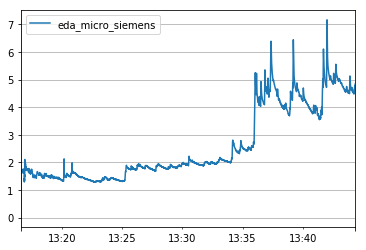

In [204]:
sensor_data['EDA'].plot()
plt.grid(True)
plt.show()

In [267]:
sensor_data['IBI']

duration_s
1521041495.000000                        
2018-03-14 15:32:21.955274000    0.593777
2018-03-14 15:32:22.564677000    0.609403
2018-03-14 15:32:23.174080000    0.609403
2018-03-14 15:32:23.814734000    0.640654
2018-03-14 15:32:24.564769000    0.750034
2018-03-14 15:32:25.314803000    0.750034
2018-03-14 15:32:29.502495000    0.843789
2018-03-14 15:32:30.471289000    0.968794
2018-03-14 15:32:31.346329000    0.875040
2018-03-14 15:32:56.331848000    0.656280
2018-03-14 15:32:56.988128000    0.656280
2018-03-14 15:33:00.457037000    0.625029
2018-03-14 15:33:01.160194000    0.703157
2018-03-14 15:33:01.800848000    0.640654
2018-03-14 15:33:02.550883000    0.750034
2018-03-14 15:33:03.300917000    0.750034
2018-03-14 15:33:04.050951000    0.750034
2018-03-14 15:33:08.035509000    0.609403
2018-03-14 15:33:08.754292000    0.718783
2018-03-14 15:33:09.410572000    0.656280
2018-03-14 15:33:10.066851999    0.656280
2018-03-14 15:33:10.863763000    0.796911
2018-03-14 15:33:11.691926000    0.828163
2018-03-14 15:33:12.535715000    0.843789
2018-03-14 15:33:16.926541000    0.703157
2018-03-14 15:33:17.582821000    0.656280
2018-03-14 15:33:18.239101000    0.656280
2018-03-14 15:33:18.942258000    0.703157
2018-03-14 15:33:19.676666000    0.734409
2018-03-14 15:33:20.504829000    0.828163
...                                   ...
2018-03-14 15:57:39.571617000    0.718783
2018-03-14 15:57:40.259148000    0.687531
2018-03-14 15:57:40.977931000    0.718783
2018-03-14 15:57:41.696714000    0.718783
2018-03-14 15:57:42.446748000    0.750034
2018-03-14 15:57:43.181157000    0.734409
2018-03-14 15:57:43.884314000    0.703157
2018-03-14 15:57:44.618723000    0.734409
2018-03-14 15:57:45.337506000    0.718783
2018-03-14 15:57:46.071914000    0.734409
2018-03-14 15:57:46.775072000    0.703157
2018-03-14 15:57:47.446977000    0.671906
2018-03-14 15:57:48.150135000    0.703157
2018-03-14 15:57:48.915795000    0.765660
2018-03-14 15:57:49.712706000    0.796911
2018-03-14 15:57:50.493992000    0.781286
2018-03-14 15:57:51.275278000    0.781286
2018-03-14 15:57:52.009686000    0.734409
2018-03-14 15:57:52.775346000    0.765660
2018-03-14 15:57:53.431626000    0.656280
2018-03-14 15:57:54.244164000    0.812537
2018-03-14 15:57:54.916069000    0.671906
2018-03-14 15:57:55.603601000    0.687531
2018-03-14 15:57:56.338009000    0.734409
2018-03-14 15:57:57.072418000    0.734409
2018-03-14 15:57:57.838078000    0.765660
2018-03-14 15:57:58.634990000    0.796911
2018-03-14 15:57:59.322521000    0.687531
2018-03-14 15:58:00.025678000    0.703157
2018-03-14 15:58:00.760087000    0.734409

[1020 rows x 1 columns]

In [202]:
tmp = tmp.drop(tmp.columns[0], axis=1)  
tmp

b
1519831733.000000                   
2018-02-28 15:31:19.319198  1.000046
2018-02-28 15:31:23.006867  0.625029
2018-02-28 15:32:44.073077  0.828163
2018-02-28 15:32:44.760609  0.687531
2018-02-28 15:33:06.120962  0.609403
2018-02-28 15:33:06.777242  0.656280
2018-02-28 15:33:07.480399  0.703157
2018-02-28 15:33:08.199182  0.718783
2018-02-28 15:33:08.886713  0.687531
2018-02-28 15:33:09.621122  0.734409
2018-02-28 15:33:17.433980  0.703157
2018-02-28 15:33:18.246517  0.812537
2018-02-28 15:33:19.027802  0.781286
2018-02-28 15:33:19.730960  0.703157
2018-02-28 15:33:20.449743  0.718783
2018-02-28 15:33:21.184151  0.734409
2018-02-28 15:33:21.934186  0.750034
2018-02-28 15:33:22.590466  0.656280
2018-02-28 15:33:23.262371  0.671906
2018-02-28 15:33:23.965528  0.703157
2018-02-28 15:33:24.699937  0.734409
2018-02-28 15:33:25.449971  0.750034
2018-02-28 15:33:26.137503  0.687531
2018-02-28 15:33:26.825034  0.687531
2018-02-28 15:33:27.496940  0.671906
2018-02-28 15:33:28.168846  0.671906
2018-02-28 15:33:28.856377  0.687531
2018-02-28 15:33:29.497032  0.640654
2018-02-28 15:33:30.137686  0.640654
2018-02-28 15:33:30.793966  0.656280
...                              ...
2018-02-28 15:51:53.156925  0.750034
2018-02-28 15:51:53.891334  0.734409
2018-02-28 15:51:54.594491  0.703157
2018-02-28 15:51:55.188268  0.593777
2018-02-28 15:51:55.875800  0.687531
2018-02-28 15:51:56.532080  0.656280
2018-02-28 15:51:57.141483  0.609403
2018-02-28 15:51:57.750886  0.609403
2018-02-28 15:51:58.454043  0.703157
2018-02-28 15:51:59.141574  0.687531
2018-02-28 15:51:59.750977  0.609403
2018-02-28 15:52:05.626246  0.656280
2018-02-28 15:52:06.345029  0.718783
2018-02-28 15:52:07.016935  0.671906
2018-02-28 15:52:07.673215  0.656280
2018-02-28 15:52:08.345121  0.671906
2018-02-28 15:52:09.032652  0.687531
2018-02-28 15:52:18.486210  0.734409
2018-02-28 15:52:19.142490  0.656280
2018-02-28 15:52:19.814396  0.671906
2018-02-28 15:52:20.486301  0.671906
2018-02-28 15:52:21.173833  0.687531
2018-02-28 15:52:21.845739  0.671906
2018-02-28 15:52:22.533270  0.687531
2018-02-28 15:52:23.267679  0.734409
2018-02-28 15:52:24.017713  0.750034
2018-02-28 15:52:24.752122  0.734409
2018-02-28 15:52:25.424027  0.671906
2018-02-28 15:52:26.064682  0.640654
2018-02-28 15:52:26.689710  0.625029

[870 rows x 1 columns]

In [234]:
[plt.plot(i.rolling(1000).mean()) for i in sensor_data]
plt.grid()
plt.ylim(-100, 100)
plt.legend(sensor_file_list)
plt.show()

AttributeError: 'str' object has no attribute 'rolling'

In [12]:
eda = pd.read_csv(os.path.join(folder, 'EDA.csv'), header=[0,1], ign)

In [24]:
start_time_utc = eda.columns[0][0]
freq_hz = eda.columns[0][1]

In [26]:
freq_hz

'4.000000'

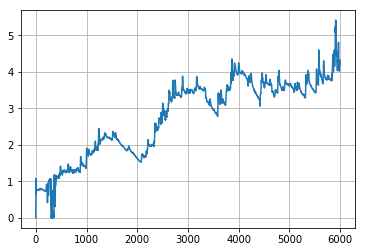

In [7]:
plt.plot(eda)
plt.grid()
plt.show()

sensor_data[np.flatnonzero([c=='HR' for c in sensor_file_list])]

## Toby's Aligned Data

In [205]:
folder = r"C:/Users/richa/Documents/CSML/Term2/AC&HRI/MusicERS/data/empatica/20180314/labelled/LynrayBarends"
folder_self_report = r"C:/Users/richa/Documents/CSML/Term2/AC&HRI/MusicERS/data/self_report/LynrayBarends"

In [206]:
folder = r"C:/Users/richa/Documents/CSML/Term2/AC&HRI/MusicERS/data/empatica/20180319/labelled/RichardSterry"
folder_self_report = r"C:/Users/richa/Documents/CSML/Term2/AC&HRI/MusicERS/data/self_report/RichardSterry"

In [207]:
this_sensor = 'HR'
#this_sensor = 'EDA'
#this_sensor = 'IBI'
tmp = pd.read_csv(os.path.join(folder, this_sensor+'.csv'))
tmp.columns = ('Sample', 'Value', 'Timestamp', 'Event')

In [208]:
dts = pd.to_datetime(tmp.Timestamp, unit='s')            
tmp.index = dts
tmp = tmp.drop("Timestamp", axis=1)  

In [209]:
tmp

Sample  Value  Event
Timestamp                                
2018-03-19 13:16:42       0  58.00     -1
2018-03-19 13:16:43       1  65.50     -1
2018-03-19 13:16:44       2  63.67     -1
2018-03-19 13:16:45       3  72.25     -1
2018-03-19 13:16:46       4  72.00     -1
2018-03-19 13:16:47       5  68.17     -1
2018-03-19 13:16:48       6  69.14     -1
2018-03-19 13:16:49       7  69.88     -1
2018-03-19 13:16:50       8  70.33     -1
2018-03-19 13:16:51       9  70.80     -1
2018-03-19 13:16:52      10  71.18     -1
2018-03-19 13:16:53      11  71.58     -1
2018-03-19 13:16:54      12  72.08     -1
2018-03-19 13:16:55      13  72.14     -1
2018-03-19 13:16:56      14  72.13     -1
2018-03-19 13:16:57      15  72.25     -1
2018-03-19 13:16:58      16  72.29     -1
2018-03-19 13:16:59      17  72.22     -1
2018-03-19 13:17:00      18  72.16     -1
2018-03-19 13:17:01      19  72.05     -1
2018-03-19 13:17:02      20  72.00     -1
2018-03-19 13:17:03      21  72.00     -1
2018-03-19 13:17:04      22  72.00     -1
2018-03-19 13:17:05      23  72.00     -1
2018-03-19 13:17:06      24  71.92     -1
2018-03-19 13:17:07      25  71.85     -1
2018-03-19 13:17:08      26  71.81     -1
2018-03-19 13:17:09      27  71.79     -1
2018-03-19 13:17:10      28  71.79     -1
2018-03-19 13:17:11      29  71.67     -1
...                     ...    ...    ...
2018-03-19 13:43:54    1632  72.52  song8
2018-03-19 13:43:55    1633  72.72  song8
2018-03-19 13:43:56    1634  72.95  song8
2018-03-19 13:43:57    1635  73.17  song8
2018-03-19 13:43:58    1636  73.37  song8
2018-03-19 13:43:59    1637  73.57  song8
2018-03-19 13:44:00    1638  73.77  song8
2018-03-19 13:44:01    1639  73.95  song8
2018-03-19 13:44:02    1640  74.15  song8
2018-03-19 13:44:03    1641  74.33  song8
2018-03-19 13:44:04    1642  74.50  song8
2018-03-19 13:44:05    1643  74.68  song8
2018-03-19 13:44:06    1644  74.90  song8
2018-03-19 13:44:07    1645  75.12  song8
2018-03-19 13:44:08    1646  75.37  song8
2018-03-19 13:44:09    1647  75.63  song8
2018-03-19 13:44:10    1648  75.93  song8
2018-03-19 13:44:11    1649  76.25  song8
2018-03-19 13:44:12    1650  76.57  song8
2018-03-19 13:44:13    1651  76.90  song8
2018-03-19 13:44:14    1652  77.28  song8
2018-03-19 13:44:15    1653  77.63  song8
2018-03-19 13:44:16    1654  77.93  song8
2018-03-19 13:44:17    1655  78.20  song8
2018-03-19 13:44:18    1656  78.30  song8
2018-03-19 13:44:19    1657  78.38  song8
2018-03-19 13:44:20    1658  78.48  song8
2018-03-19 13:44:21    1659  78.58  song8
2018-03-19 13:44:22    1660  78.67  song8
2018-03-19 13:44:23    1661  78.75  song8

[1662 rows x 3 columns]

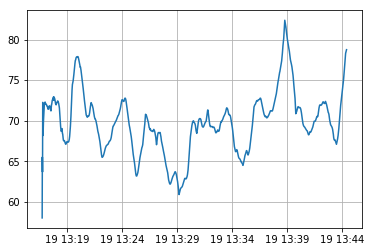

In [210]:
plt.plot(tmp['Value'])
plt.grid()
plt.show()

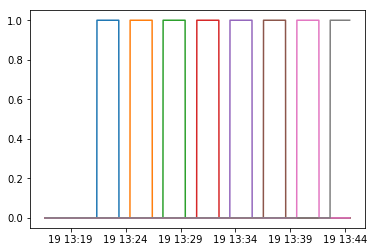

In [211]:
mean_reading = np.zeros(8)
for i in range(8):
    idx = tmp.Event == 'song'+str(i+1)
    plt.plot(idx)
    mean_reading[i] = tmp[idx]['Value'].mean()

In [217]:
tmp[tmp.Event == 'song5']

Sample  Value  Event
Timestamp                                
2018-03-19 13:33:30    1008  71.57  song5
2018-03-19 13:33:31    1009  71.53  song5
2018-03-19 13:33:32    1010  71.52  song5
2018-03-19 13:33:33    1011  71.48  song5
2018-03-19 13:33:34    1012  71.42  song5
2018-03-19 13:33:35    1013  71.35  song5
2018-03-19 13:33:36    1014  71.25  song5
2018-03-19 13:33:37    1015  71.13  song5
2018-03-19 13:33:38    1016  71.02  song5
2018-03-19 13:33:39    1017  70.90  song5
2018-03-19 13:33:40    1018  70.78  song5
2018-03-19 13:33:41    1019  70.78  song5
2018-03-19 13:33:42    1020  70.77  song5
2018-03-19 13:33:43    1021  70.72  song5
2018-03-19 13:33:44    1022  70.68  song5
2018-03-19 13:33:45    1023  70.70  song5
2018-03-19 13:33:46    1024  70.68  song5
2018-03-19 13:33:47    1025  70.67  song5
2018-03-19 13:33:48    1026  70.62  song5
2018-03-19 13:33:49    1027  70.57  song5
2018-03-19 13:33:50    1028  70.48  song5
2018-03-19 13:33:51    1029  70.35  song5
2018-03-19 13:33:52    1030  70.22  song5
2018-03-19 13:33:53    1031  70.08  song5
2018-03-19 13:33:54    1032  69.93  song5
2018-03-19 13:33:55    1033  69.78  song5
2018-03-19 13:33:56    1034  69.63  song5
2018-03-19 13:33:57    1035  69.50  song5
2018-03-19 13:33:58    1036  69.37  song5
2018-03-19 13:33:59    1037  69.23  song5
...                     ...    ...    ...
2018-03-19 13:35:01    1099  64.75  song5
2018-03-19 13:35:02    1100  64.87  song5
2018-03-19 13:35:03    1101  64.97  song5
2018-03-19 13:35:04    1102  65.12  song5
2018-03-19 13:35:05    1103  65.25  song5
2018-03-19 13:35:06    1104  65.38  song5
2018-03-19 13:35:07    1105  65.53  song5
2018-03-19 13:35:08    1106  65.65  song5
2018-03-19 13:35:09    1107  65.72  song5
2018-03-19 13:35:10    1108  65.77  song5
2018-03-19 13:35:11    1109  65.83  song5
2018-03-19 13:35:12    1110  65.92  song5
2018-03-19 13:35:13    1111  66.02  song5
2018-03-19 13:35:14    1112  66.12  song5
2018-03-19 13:35:15    1113  66.22  song5
2018-03-19 13:35:16    1114  66.23  song5
2018-03-19 13:35:17    1115  66.30  song5
2018-03-19 13:35:18    1116  66.30  song5
2018-03-19 13:35:19    1117  66.25  song5
2018-03-19 13:35:20    1118  66.17  song5
2018-03-19 13:35:21    1119  66.08  song5
2018-03-19 13:35:22    1120  65.98  song5
2018-03-19 13:35:23    1121  65.90  song5
2018-03-19 13:35:24    1122  65.78  song5
2018-03-19 13:35:25    1123  65.77  song5
2018-03-19 13:35:26    1124  65.77  song5
2018-03-19 13:35:27    1125  65.82  song5
2018-03-19 13:35:28    1126  65.92  song5
2018-03-19 13:35:29    1127  65.98  song5
2018-03-19 13:35:30    1128  66.05  song5

[121 rows x 3 columns]

In [213]:
mean_reading

array([ 67.9225    ,  67.3314876 ,  63.75413223,  69.6014876 ,
        67.09380165,  72.58586777,  70.1285124 ,  71.05560748])

In [215]:
sr = []
for i in range(8):
    sr.append(pd.read_csv(os.path.join(folder_self_report, str(i+1)+'.csv')))

FileNotFoundError: File b'C:/Users/richa/Documents/CSML/Term2/AC&HRI/MusicERS/data/self_report/RichardSterry\\1.csv' does not exist

In [168]:
arousal = [int(list(sr[i][sr[i]['Particiant_Name'] == 'Arousal']['LynrayBarends'])[0]) for i in range(8)]

In [169]:
print(arousal)
print(mean_reading)

[-2, -3, -2, 4, -2, -4, 4, 4]
[ 85.34099174  86.51532787  84.94696721  75.64892562  83.97918033
  81.26336066  79.23163934  79.65754098]


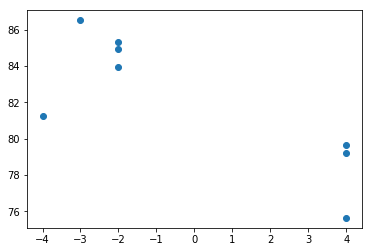

In [170]:
plt.scatter(arousal, mean_reading)